# Main title

Some text...

* explanatory bullets

## Set up Environment and Get Data

In [31]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Import packages
import numpy as np
import pandas as pd
import os
import urllib
import tarfile

# to ensure 'randomisation' is the same every time 
np.random.seed(5)

# Set up plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set base WD
PROJECT_ROOT_DIR = 'C:/Users/kwsp220/Box Sync/projects/cambridge_team/conference/WoSR/WoSR'

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = PROJECT_ROOT_DIR + '/output/python/plots/' + fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignore warnings for now - not a good idea in general...
import warnings
warnings.filterwarnings('ignore')

In [3]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Load data

In [5]:
# load data
data_file = "ExerciseHealthDataSet.csv"
p = PROJECT_ROOT_DIR + '/data/' + data_file
data_set = pd.read_csv(p)

In [6]:
data_set.shape

(39242, 159)

In [7]:
# explore data a little
def basic_data_properties(dat):
    feature_count = dat.shape[1]
    cols = list(dat.columns.values)
    NA_count = dat.isnull().sum()
    dtypes = list(dat.dtypes)
    # create and view table with type and NA information
    pd.set_option("display.max_rows",feature_count) #pd.reset_option("^display")
    return pd.DataFrame({'colname': cols, 'dtype': dtypes, 'nas': NA_count}).reset_index(), feature_count, cols 

In [8]:
props, feature_count, cols = basic_data_properties(data_set)
props

,index,colname,dtype,nas
0,user_name,user_name,object,0
1,raw_timestamp_part_1,raw_timestamp_part_1,int64,0
2,raw_timestamp_part_2,raw_timestamp_part_2,int64,0
3,cvtd_timestamp,cvtd_timestamp,object,0
4,new_window,new_window,object,0
5,num_window,num_window,int64,0
6,roll_belt,roll_belt,float64,0
7,pitch_belt,pitch_belt,float64,0
8,yaw_belt,yaw_belt,float64,0
9,total_accel_belt,total_accel_belt,int64,0


### Explore and prepare training set

#### Split into training and test set

In [9]:
# do we need stratified split?
data_set["classe"].value_counts()/len(data_set)*100

A    28.436369
B    19.349167
E    18.383365
C    17.440497
D    16.390602
Name: classe, dtype: float64

In [10]:
# we do, train_test_split does it already (used to be StratifiedShuffleSplit)
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(data_set, test_size=0.2, random_state=2)

In [11]:
# let's see:
training_set["classe"].value_counts()/len(training_set)*100

A    28.455388
B    19.361004
E    18.220622
C    17.322333
D    16.640652
Name: classe, dtype: float64

In [12]:
props, feature_count, cols = basic_data_properties(training_set)
props

,index,colname,dtype,nas
0,user_name,user_name,object,0
1,raw_timestamp_part_1,raw_timestamp_part_1,int64,0
2,raw_timestamp_part_2,raw_timestamp_part_2,int64,0
3,cvtd_timestamp,cvtd_timestamp,object,0
4,new_window,new_window,object,0
5,num_window,num_window,int64,0
6,roll_belt,roll_belt,float64,0
7,pitch_belt,pitch_belt,float64,0
8,yaw_belt,yaw_belt,float64,0
9,total_accel_belt,total_accel_belt,int64,0


In [13]:
pd.set_option("display.max_columns",feature_count)
training_set.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,kurtosis_roll_dumbbell,kurtosis_picth_dumbbell,kurtosis_yaw_dumbbell,skewness_roll_dumbbell,skewness_pitch_dumbbell,skewness_yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,max_yaw_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,min_yaw_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,amplitude_yaw_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
34147,charles,1322837922,792350,02/12/2011 14:58,no,753,119.00,15.90,-1.07,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.11,-0.15,-18,62,-162,29,597,-331,-57.4,-26.60,0.02,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,-1.03,1.00,121,-122,-99,741,-21,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.945531,9.954512,-4.971087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.16,-0.05,2,20,-1,-389.0,485.0,-45.0,-74.7,32.9,-156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.24,1.73,0.16,-447.0,-197.0,-3,-562.0,-170.0,248.0,D
37160,eurico,1322489607,106710,28/11/2011 14:13,no,819,1.17,5.88,-87.60,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02,0.00,-0.02,-11,4,30,67,581,-417,55.0,24.10,47.70,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.06,0.15,-72,155,-41,265,78,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.688321,-56.800589,98.244659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,-205,52,317,-423.0,226.0,310.0,-132.0,-64.5,69.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN

#### Remove ID and time stamp variables
move this to the beginning, to data_set

In [14]:
training_set = training_set[cols[6:]]

#### Data types

In [15]:
training_set.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [16]:
# some features have #DIV errors besides missing values, forcing dtype to be object 
training_set["kurtosis_yaw_belt"].unique()

array([nan, '#DIV/0!'], dtype=object)

#### Convert features to numeric
this should go up to be applied to data_set

In [17]:
# replace DIV errors with nan
training_set = training_set.replace('#DIV/0!',np.nan)

In [18]:
# convert all but class label
training_set.iloc[:,1:-1] = training_set.iloc[:,1:-1].convert_objects(convert_numeric=True)

In [19]:
# the only remaining object is the class label
training_set.dtypes[training_set.dtypes=='object']

classe    object
dtype: object

#### quick look at data

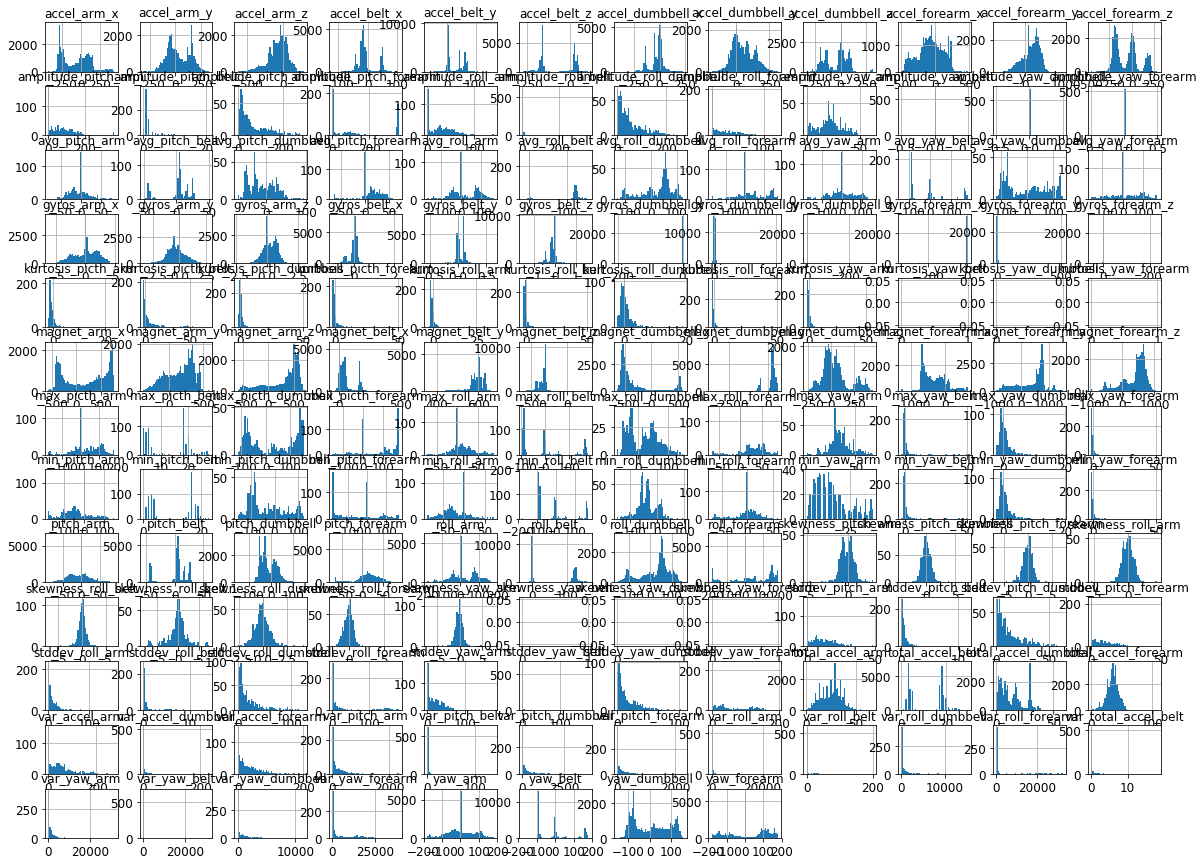

In [20]:
training_set.hist(bins=50, figsize=(20,15))
plt.show()

#### check how many missing datapoints we have

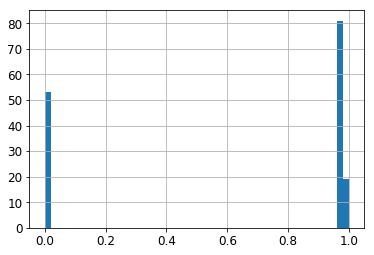

In [21]:
NA_ratio = training_set.isnull().sum() / len(training_set)
NA_ratio.hist(bins=50)
plt.show()

#### remove features where most of (> 95%) the values are missing

In [22]:
features_missing_values = training_set.isnull().sum() / len(training_set) > .95
features_drop = list(features_missing_values[features_missing_values].index)
training_set.drop(features_drop, axis=1, inplace=True)

In [23]:
training_set.shape

(31393, 53)

In [24]:
# check if there are ant NaNs left
props, feature_count, cols = basic_data_properties(training_set)
props

,index,colname,dtype,nas
0,roll_belt,roll_belt,float64,0
1,pitch_belt,pitch_belt,float64,0
2,yaw_belt,yaw_belt,float64,0
3,total_accel_belt,total_accel_belt,int64,0
4,gyros_belt_x,gyros_belt_x,float64,0
5,gyros_belt_y,gyros_belt_y,float64,0
6,gyros_belt_z,gyros_belt_z,float64,0
7,accel_belt_x,accel_belt_x,int64,0
8,accel_belt_y,accel_belt_y,int64,0
9,accel_belt_z,accel_belt_z,int64,0


#### Separate features (predictors) and outcome (labels)

In [25]:
train_Y = pd.DataFrame(training_set["classe"])
train_X = training_set.drop("classe", axis=1) 

#### Impute mean value(s) where we have missing data still

In [26]:
from sklearn.preprocessing import Imputer
# might want to look into MICEImputer at one point (multivar imputing) 

imputer = Imputer(strategy="median")

train_X = pd.DataFrame(imputer.fit_transform(train_X), columns=train_X.columns,
                       index = list(train_X.index.values))                           # returns array, not dataframe

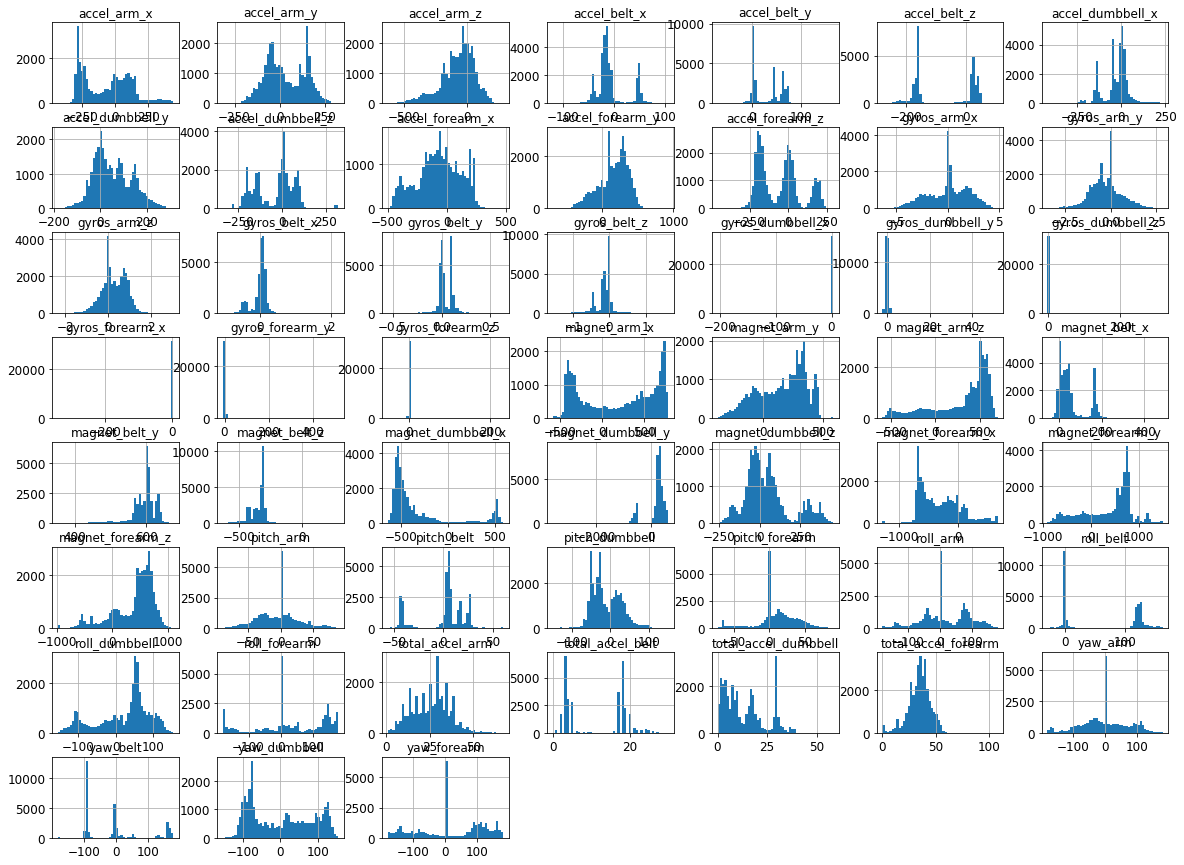

In [27]:
training_set.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

Saving figure attribute_histogram_plots


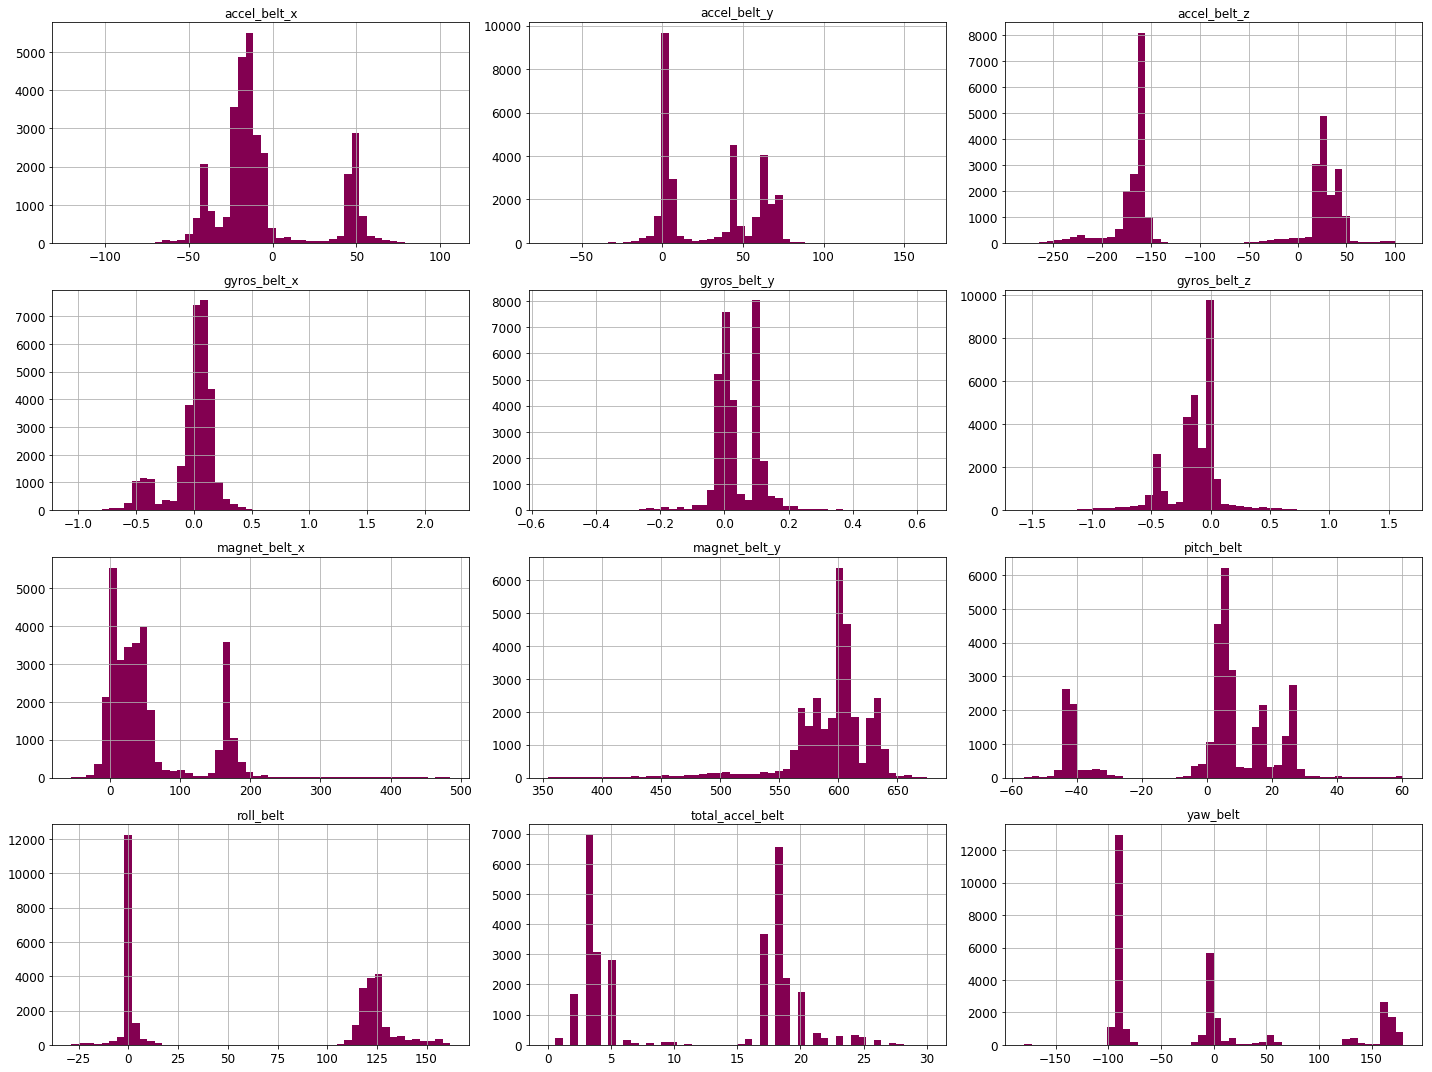

In [32]:
train_X.iloc[:,0:12].hist(bins=50, figsize=(20,15), color='#830051')
save_fig("attribute_histogram_plots")
plt.show()

#### check correlations
will have to review this

RFECV

In [ ]:
# check cor, kruskal and kruskalwallis too
from scipy.stats.stats import kendalltau

corr_array = []
for feature_ in train_X.columns.values:
    corr_array.append(kendalltau(train_X[feature_], train_Y['classe']).correlation)

# create an array with absolute values - so neg correlations are also sorted acording to strength  
abs_corr = [abs(coef) for coef in corr_array]

In [ ]:
#take a look at the correlations
pd.DataFrame({'feature':train_X.columns.values,'abs_coef':abs_corr}).sort_values(by='abs_coef', ascending=False)

In [ ]:
import seaborn as sns
#https://stackoverflow.com/questions/32992773/seaborn-specify-an-exact-color

sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="classe", y="pitch_forearm", data=pd.concat([train_X, train_Y["classe"]], axis=1));

In [ ]:
features = train_X.columns.values
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
for i in range(1, 13):
    plt.subplot(4, 3, i)
    sns.boxplot(x="classe", y=features[i], data=pd.concat([train_X, train_Y["classe"]], axis=1))
                
save_fig("attribute_boxplots")

In [ ]:
# plot relationships among some of the top features
from pandas.plotting import scatter_matrix

attributes = ["pitch_forearm", "magnet_arm_x", "magnet_belt_y",
              "magnet_arm_y"]
scatter_matrix(train_X[attributes], figsize=(12, 8), color='#830051')
save_fig("scatter_matrix_plot")

#### scale

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns,
                       index = list(train_X.index.values))                      # scaler returns array, not dataframe

#### remove features with 0 variance
we don't have any here though. Either remove, or has to go up to before train-test split

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
train_X = pd.DataFrame(selector.fit_transform(train_X), columns=train_X.columns,
                       index = list(train_X.index.values))

#### label encoding

In [ ]:
# or labelbinarizer for OvA below?
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_Ycat = pd.DataFrame(lb.fit_transform(train_Y), columns=train_Y.columns,
                          index = list(train_Y.index.values))

## Model building and evaluation
there is a crossval confusion matrix for each model - will not put in all in the final version
confusion matrices per each model will also be arranged into a plot with subplots, instead of separate plots

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=2, solver='lbfgs')
#LogisticRegression(penalty='l2',C=.01)
log_reg.fit(train_X, train_Ycat)

In [ ]:
predictions = log_reg.predict(train_X)

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
#plt.rcParams['figure.figsize'] = (5,5)
#plt.rcParams.update(plt.rcParamsDefault)
import itertools

classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
conf

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# other functions: precision_score, recall_score

#precision = precision_score(train_Ycat, predictions, average='weighted')
#recall = recall_score(train_Ycat, predictions, average='weighted')
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

#### Cross-validation

In [ ]:
## crossval iterator
#from sklearn.cross_validation import ShuffleSplit
#cv = ShuffleSplit(train_X.shape[0], n_iter=3, test_size=0.2, random_state=2)

In [ ]:
from sklearn.model_selection import cross_val_predict

train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(log_reg, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Support Vector Machine
understand why this one is relatively weak (and leans towards the first class), or delete from final

In [ ]:
from sklearn.linear_model import SGDClassifier
# radial basis function kernel/ kernel approximation
from sklearn.kernel_approximation import RBFSampler

# this actually doesn't help... have to read more about this
#rbf_feature = RBFSampler(gamma=1, random_state=1)
#train_X_rbf = rbf_feature.fit_transform(train_X)

sgd_clf = SGDClassifier(random_state=2)
sgd_clf.fit(train_X, train_Ycat)

In [ ]:
predictions = sgd_clf.predict(train_X)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(sgd_clf, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_X, train_Ycat)

In [ ]:
predictions = tree_clf.predict(train_X)

In [ ]:
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(tree_clf, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth=10, random_state=2)
forest_clf.fit(train_X, train_Ycat)

In [ ]:
predictions = forest_clf.predict(train_X)

In [ ]:
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(forest_clf, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

#### feature importance
move this later to the selected model

In [ ]:
feature_importance = pd.DataFrame(list(zip(strat_valid_X, forest_clf.feature_importances_)))
feature_importance.columns = ('feature','importance')
feature_importance.sort_values(by='importance', ascending=False)[0:9]

In [ ]:
# what happens if we use the first X important features instead of all
#
#

### XGboost

In [ ]:
# in conda:
#git clone --recursive https://github.com/dmlc/xgboost

In [ ]:
import xgboost as xgb

# model constructor
xgb_clf = xgb.XGBClassifier(colsample_bytree=0.8)
xgb_clf.fit(train_X, train_Ycat)

In [ ]:
predictions = xgb_clf.predict(train_X)

In [ ]:
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(xgb_clf, train_X, train_Ycat, cv=3)    
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

In [ ]:
feature_importance = pd.DataFrame(list(zip(train_X, xgb_clf.feature_importances_)))
feature_importance.columns = ('feature','importance')
#feature_importance['unit'] = (1/len(feature_importance))<feature_importance['importance']  # weight smaller than 1/num_features
feature_importance.sort_values(by='importance', ascending=False)[0:15]

#### trying to drop low weight features - doesn't improve model - leave out

In [ ]:
sel_features = (feature_importance['feature'][feature_importance['unit']])

In [ ]:
plt.plot(np.arange(len(feature_importance)),feature_importance['importance'].sort_values(ascending=False))

In [ ]:
# train on selected features
xgb_clf.fit(train_X[sel_features], train_Ycat)

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(xgb_clf, train_X[sel_features], train_Ycat, cv=10)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Grid search and tuning - just started

#### can we tune log_reg?

In [ ]:
# construct an iterator
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(train_X.shape[0], n_iter=10, test_size=0.2, random_state=2)

In [ ]:
from sklearn.grid_search import GridSearchCV

#Cs = np.arange(1,2)
multitype = ('ovr','multinomial')
classifier = GridSearchCV(estimator=log_reg, cv=cv, param_grid=dict(multi_class=multitype), n_jobs=-1)
classifier.fit(train_X, train_Ycat)

In [ ]:
classifier.best_estimator_

### Diagnostics - learning curves
will arrange into one plot with subplots

In [ ]:
# to plot learning curve
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [ ]:
train_X.size

In [ ]:
# log_reg
title = 'Learning Curves (log_reg, multi_class=%s)' %classifier.best_estimator_.multi_class
estimator = classifier.best_estimator_
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

In [ ]:
# forest_clf
title = 'Learning Curves (forest_clf)' 
estimator = forest_clf
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

In [ ]:
# tree_clf
title = 'Learning Curves (tree_clf)' 
estimator = tree_clf
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

In [ ]:
# xgb_clf
title = 'Learning Curves (xgb_clf)' 
estimator = xgb_clf
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

### Test a couple of them on the test set - ignore this for now

#### Apply preprocessing steps to test set

In [ ]:
props, feature_count, cols = basic_data_properties(test_set)

test_set = test_set[cols[6:]]

# replace DIV errors with nan
test_set = test_set.replace('#DIV/0!',np.nan)

# convert all but class label
test_set.iloc[:,1:-1] = test_set.iloc[:,1:-1].convert_objects(convert_numeric=True)

features_missing_values = test_set.isnull().sum() / len(test_set) > .95
features_drop = list(features_missing_values[features_missing_values].index)
test_set.drop(features_drop, axis=1, inplace=True)

In [ ]:
test_Y = pd.DataFrame(test_set["classe"])
test_X = test_set.drop("classe", axis=1) 

# imputer
test_X = pd.DataFrame(imputer.fit_transform(test_X), columns=test_X.columns,
                       index = list(test_X.index.values))                           # returns array, not dataframe

# scaling
test_X = pd.DataFrame(scaler.fit_transform(test_X), columns=test_X.columns,
                       index = list(test_X.index.values))  

# label encoding
test_Ycat = pd.DataFrame(lb.fit_transform(test_Y), columns=test_Y.columns,
                         index = list(test_Y.index.values))

### Check log_reg

In [ ]:

test_predictions = log_reg.predict(test_X)
conf = confusion_matrix(test_Ycat, test_predictions)

classes = np.unique(test_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(test_Ycat, test_predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Check tree

In [ ]:
test_predictions = tree_clf.predict(test_X)
conf = confusion_matrix(test_Ycat, test_predictions)

classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(test_Ycat, test_predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))